In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [10]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        reader=training_file.readlines()[1:]
        images=np.empty((len(reader),28,28))
        labels=np.empty(len(reader))
        for (i,row) in enumerate(reader):
            row=row.strip().split(',')
            labels[i]=int(row[0])
            images[i,...]=np.array_split(np.asarray(row[1:785],dtype=np.float32),28)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [15]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=-1)
testing_images = np.expand_dims(testing_images,axis=-1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=.2,height_shift_range=.2,
    shear_range=.2,zoom_range=.2,
    horizontal_flip=True,fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1/255)

train_generator=train_datagen.flow(training_images,training_labels,batch_size=128)
validation_generator=validation_datagen.flow(testing_images,testing_labels,batch_size=128)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [34]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model. 
opt=tf.keras.optimizers.RMSprop(lr=.0001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['acc'])

# Train the Model
history = model.fit_generator(train_generator,epochs=5,steps_per_epoch=214,validation_data=validation_generator,validation_steps=56)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/5
214/214 [==============================] - 37s 172ms/step - loss: 2.9828 - acc: 0.1193 - val_loss: 2.3700 - val_acc: 0.3064
Epoch 2/5
214/214 [==============================] - 37s 171ms/step - loss: 2.5732 - acc: 0.2267 - val_loss: 1.9879 - val_acc: 0.3599
Epoch 3/5
214/214 [==============================] - 35s 162ms/step - loss: 2.2936 - acc: 0.3008 - val_loss: 1.5509 - val_acc: 0.4706
Epoch 4/5
214/214 [==============================] - 35s 164ms/step - loss: 2.0807 - acc: 0.3685 - val_loss: 1.3537 - val_acc: 0.5816
Epoch 5/5
214/214 [==============================] - 35s 166ms/step - loss: 1.8992 - acc: 0.4197 - val_loss: 1.3476 - val_acc: 0.5525


[205.53018976521108, 0.382599]

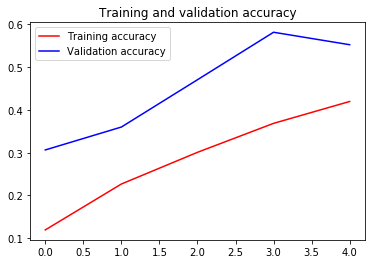

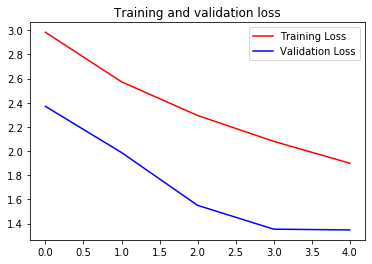

In [36]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [37]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [38]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);